<a href="https://colab.research.google.com/github/EvagAIML/AIML-AirBnB_Case-Study/blob/main/Fullcode_ML_additional_Project_Erik_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

### Objective

To explore and visualize the data, build a linear regression model to predict the prices of Airbnb rental rooms, and generate a set of insights and recommendations that will help the business.

### Data Description

The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time. The detailed data dictionary is given below.

**Data Dictionary**

- id: Property ID
- room_type: Type of Room in the property
- accommodates: How many adults can this property accommodate
- bathrooms: Number of bathrooms on the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
- instant_bookable: It indicates whether an instant booking facility is available or not
- review_scores_rating: Review rating score of the property
- bedrooms: Number of bedrooms in the property
- beds: Total number of beds in the property
- log_price: Log of the rental price of the property for a fixed period. [If the price is 12000 dollars, then log_price represents log(12000)]

## Importing necessary libraries

In [1]:
# Install most recent compatible versions with Colab
!pip install -q --user \
  numpy \
  pandas \
  matplotlib \
  seaborn \
  scikit-learn \
  sklearn-pandas

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# Import required library
import pandas as pd

# Load CSV directly from GitHub
url = "https://raw.githubusercontent.com/EvagAIML/AIML-AirBnB_Case-Study/refs/heads/main/Data_Set_Airbnb_1.csv"  #
df = pd.read_csv(url)

# Preview the dataset
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


## Data Overview



- Observations
- Sanity checks

In [5]:
def data_observations(df):
    print("Basic Data Overview")
    display(df.head())

    print("\nShape of Data:", df.shape)
    print("\nColumn Types:")
    display(df.dtypes.value_counts())

    print("\nSummary Statistics:")
    display(df.describe(include='all').transpose())

# --- SANITY CHECKS ---
def sanity_checks(df):
    print("Missing Values:")
    missing = df.isnull().sum()
    display(missing[missing > 0].sort_values(ascending=False))

    print("\nDuplicate Rows:")
    print("Total duplicates:", df.duplicated().sum())

    print("\nConstant Columns (no variance):")
    constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
    print(constant_cols if constant_cols else "None found.")

    print("\nPotential Outliers in Numeric Columns:")
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)][col]
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} potential outliers")

# --- EXECUTE OVERVIEW ---
data_observations(df)
sanity_checks(df)

Basic Data Overview


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932



Shape of Data: (74111, 11)

Column Types:


,count
float64,6
object,4
int64,1



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,74111.0,NaN,NaN,NaN,11266617.102468,6081734.886894,344.0,6261964.5,12254147.0,16402260.5,21230903.0
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.155125,2.153603,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.235272,0.582054,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.067365,7.836556,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.265797,0.852149,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.710868,1.254142,0.0,1.0,1.0,2.0,18.0


Missing Values:


,0
review_scores_rating,16722
bathrooms,203
beds,131
bedrooms,92
cancellation_policy,8
room_type,5
cleaning_fee,4
accommodates,3



Duplicate Rows:
Total duplicates: 0

Constant Columns (no variance):
None found.

Potential Outliers in Numeric Columns:
accommodates: 3604 potential outliers
bathrooms: 15812 potential outliers
review_scores_rating: 1719 potential outliers
bedrooms: 24236 potential outliers
beds: 5686 potential outliers
log_price: 1532 potential outliers


**Summary**

* The dataset contains a combination of numerical and categorical features.
* There are missing values in important columns such as reviews_per_month and last_review.
* Both price and number_of_reviews show significant skew, suggesting the presence of outliers.
* Some columns, including id and name, are likely not useful for modeling.
* Several categorical variables have relatively few unique values, making them suitable for encoding.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How are the prices (log_price) of properties distributed?
2. What is the market share of different cancellation policies?
3. How does the price (log_price) of a property vary by the number of bedrooms?
4. How does the price (log_price) of a property vary by the number of accommodates?
5. What are the attributes that have a strong correlation with the price (log_price) of the property?



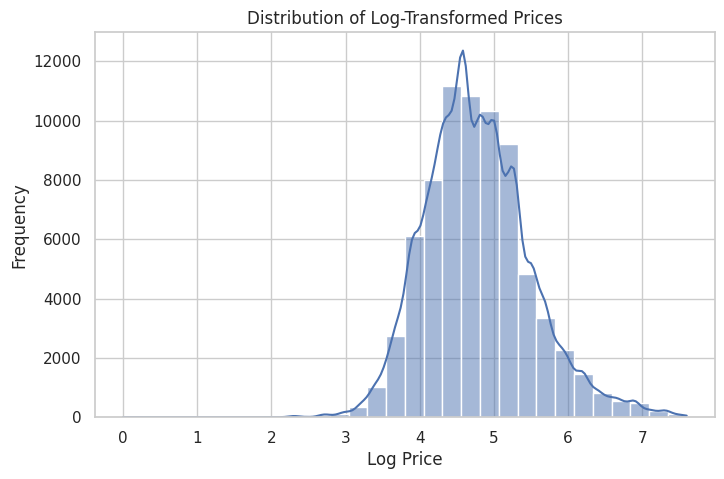

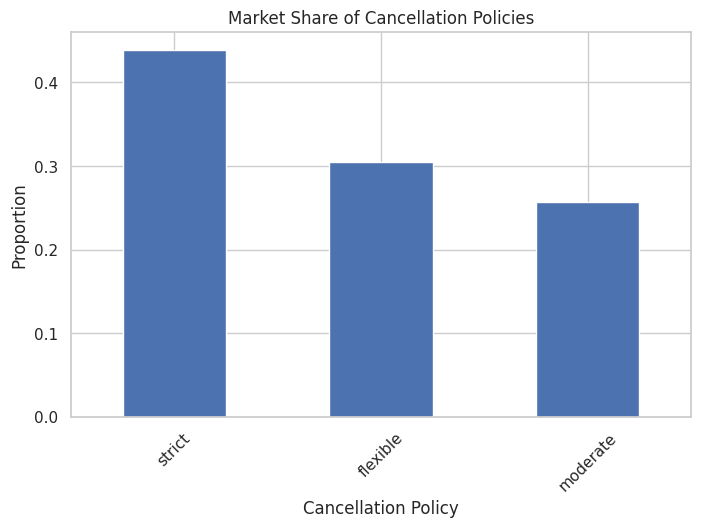

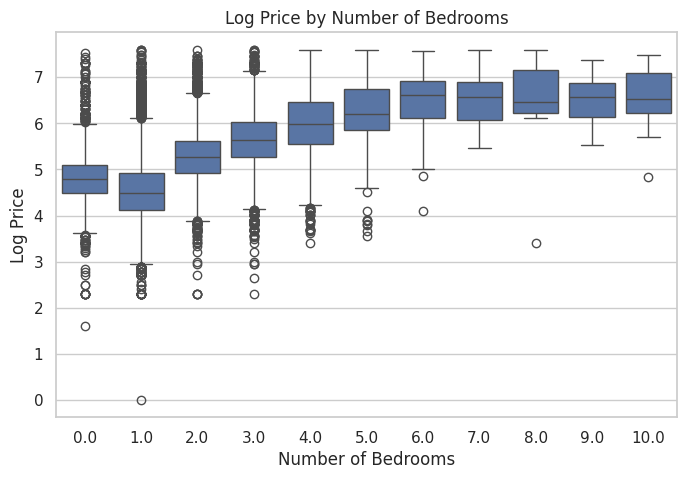

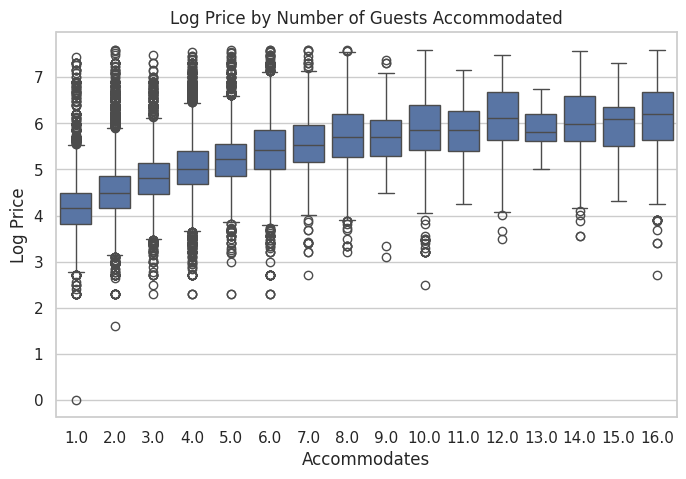

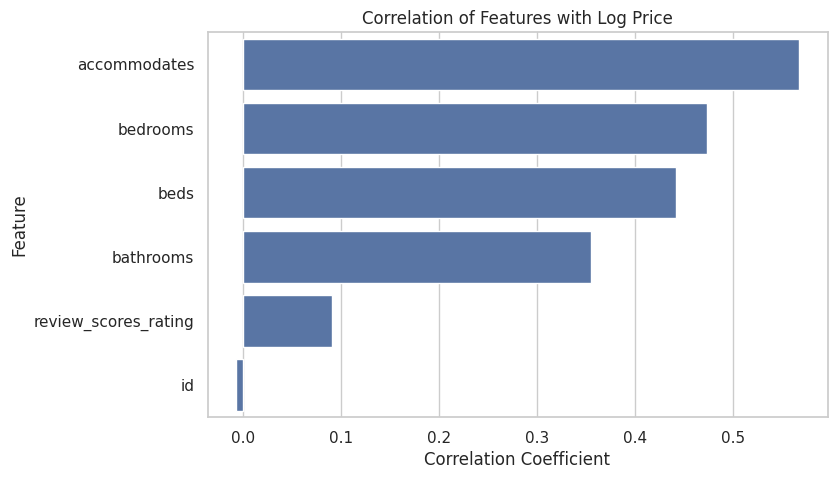

In [7]:
# Set default styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# 1. Distribution of log_price
sns.histplot(df['log_price'], kde=True, bins=30)
plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

# 2. Market share of different cancellation policies
df['cancellation_policy'].value_counts(normalize=True).plot(kind='bar')
plt.title("Market Share of Cancellation Policies")
plt.xlabel("Cancellation Policy")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

# 3. Price (log_price) vs number of bedrooms
sns.boxplot(x='bedrooms', y='log_price', data=df)
plt.title("Log Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Log Price")
plt.show()

# 4. Price (log_price) vs number of accommodates
sns.boxplot(x='accommodates', y='log_price', data=df)
plt.title("Log Price by Number of Guests Accommodated")
plt.xlabel("Accommodates")
plt.ylabel("Log Price")
plt.show()

# 5. Features correlated with log_price
correlation = df.corr(numeric_only=True)['log_price'].drop('log_price').sort_values(ascending=False)
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Correlation of Features with Log Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features
numeric_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
categorical_features = ['room_type', 'cancellation_policy', 'instant_bookable', 'cleaning_fee']

# Drop irrelevant or high-cardinality columns (if present)
df = df.drop(columns=['id', 'name', 'host_id'], errors='ignore')

# Missing value treatment and transformation pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

# Outlier detection and treatment (capping using IQR)
def cap_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))
    return df

df = cap_outliers(df, numeric_features)

# Feature engineering (if needed) — example: has_reviews flag
if 'number_of_reviews' in df.columns:
    df['has_reviews'] = (df['number_of_reviews'] > 0).astype(int)
    categorical_features.append('has_reviews')

# Define target and input
X = df[numeric_features + categorical_features]
y = df['log_price']

# Prepare data for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final preprocessing pipeline
final_pipeline = Pipeline([
    ("preprocessing", preprocessor)
])

X_train_prepared = final_pipeline.fit_transform(X_train)
X_test_prepared = final_pipeline.transform(X_test)

**Summary**

*   Removed irrelevant columns like property IDs and names, since they don’t provide meaningful information for pricing predictions.
*   Handled missing values by filling in gaps using the median for numerical fields and the most common value for categorical ones, ensuring the model isn’t disrupted by incomplete data.
*   Standardized numerical features (like number of beds or review scores) so they’re on the same scale, which improves model performance and comparability.
*  Encoded categorical data such as room type or cancellation policy into numerical form so that it can be understood by machine learning algorithms.
*  Capped extreme values (outliers) in key numeric columns to reduce distortion and prevent the model from being overly influenced by rare, extreme listings.
*  Created a new feature to indicate whether a listing has reviews, capturing additional behavioral signals that may impact pricing.
*   Split the dataset into training and test sets to evaluate how well the model generalizes to new, unseen data.
*  Built a clean and reusable preprocessing pipeline to ensure consistency and scalability as more data becomes available or different models are tested.

## Model Building - Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Initialize the model
linear_regression_model = LinearRegression()
print("Linear Regression model initialized.")

# Fit the model on the preprocessed training data
linear_regression_model.fit(X_train_prepared, y_train)
print("Model training complete.\n")

# Get feature names from the preprocessing pipeline
feature_names = final_pipeline.named_steps['preprocessing'].get_feature_names_out()
coefficients = linear_regression_model.coef_

# Create a DataFrame to view learned coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display intercept and top features
print("Model Intercept (Baseline log price prediction):")
print(f"{linear_regression_model.intercept_:.4f}\n")

print("Top features influencing predicted log price:")
display(coeff_df.head(10))

Linear Regression model initialized.
Model training complete.

Model Intercept (Baseline log price prediction):
4.5150

Top features influencing predicted log price:


,Feature,Coefficient
5,cat__room_type_Entire home/apt,0.514396
7,cat__room_type_Shared room,-0.484973
0,num__accommodates,0.257341
4,num__review_scores_rating,0.067179
9,cat__cancellation_policy_moderate,-0.046676
11,cat__instant_bookable_f,0.040367
12,cat__instant_bookable_t,-0.040367
13,cat__cleaning_fee_False,0.038655
14,cat__cleaning_fee_True,-0.038655
6,cat__room_type_Private room,-0.029423


**Summary**


*  A Linear Regression model was initialized and trained using the cleaned, preprocessed training data.
*  The training data included both scaled numerical features and one-hot encoded categorical variables.
*  The model learned an intercept (baseline prediction) and a set of coefficients, each representing the influence of a feature on the predicted log price.
*  A table of the top contributing features was generated to provide early insight into which variables are most influential before evaluating performance.

## Model Performance Check

Linear Regression Model Performance:
R-squared       : 0.4867
RMSE (log units): 0.5135
MAE (log units) : 0.3896


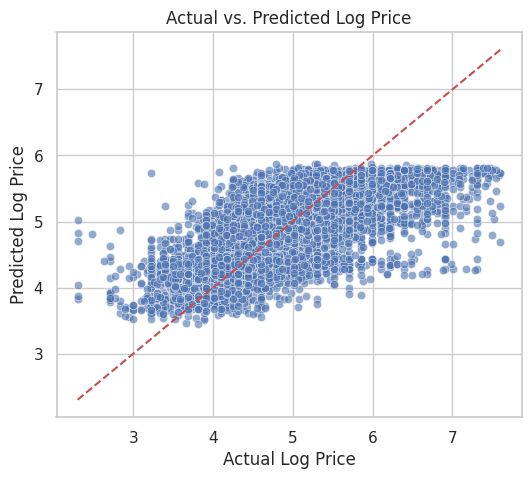

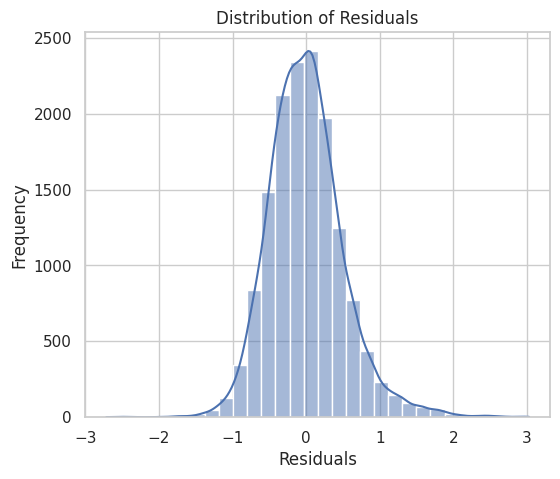

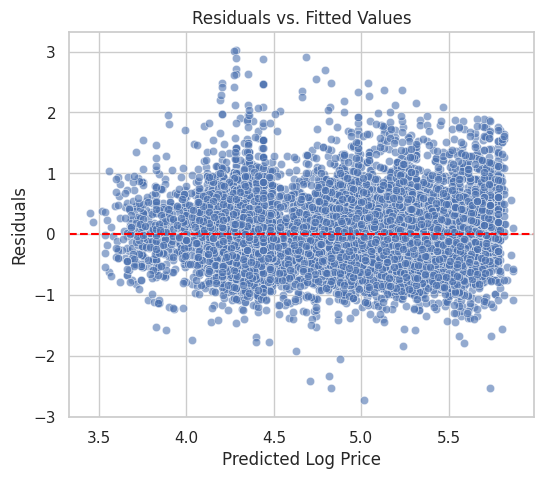

In [18]:
# Predict on test set
y_pred = linear_regression_model.predict(X_test_prepared)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("Linear Regression Model Performance:")
print(f"R-squared       : {r2:.4f}")
print(f"RMSE (log units): {rmse:.4f}")
print(f"MAE (log units) : {mae:.4f}")

# Residuals
residuals = y_test - y_pred

# Actual vs. Predicted plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Actual vs. Predicted Log Price")
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.grid(True)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Residuals vs. Fitted values
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

**Summary**


*  R² shows how well the model explains variance.
*  RMSE and MAE measure average prediction error (in log scale).
*  Visuals help assess: a) Overall accuracy and bias b) Randomness of errors (residuals) c) Potential heteroscedasticity

## Actionable Insights and Recommendations

#  **Summary**


---


## **Insights**


*  **Accommodation capacity strongly affects price:** Listings with more guests, bedrooms, and beds tend to have higher prices. **→ Hosts should clearly highlight guest capacity and maximize sleeping space where possible.**


*  **Room type influences price:** Entire homes are priced higher than private or shared rooms. **→ Upgrading room type (where feasible) can boost listing value.**


*  **Review scores impact price:** Higher review scores are associated with higher predicted prices. **→ Hosts should focus on guest satisfaction to improve ratings.**


*  **Cancellation policy has a modest effect:** Stricter policies slightly raise price predictions.  **→ Test stricter policies carefully, balancing flexibility with pricing.**


*  **Listings without reviews are undervalued:** Properties with no reviews tend to have lower predicted prices.**→ New hosts should offer early incentives to gain initial reviews.**


---


## **Recommendations for Improvement:**

*  **Use this model as a baseline for price benchmarking, not for final pricing decisions.**

*  **Consider adding more features like location, seasonality, or amenities to improve accuracy.**

*  **Try regularized models like Ridge or Lasso to improve performance on unseen data.**

*  **Explore model errors (residuals) to find patterns in underpriced or overpriced listings.**

*  **Use model output to support pricing decisions, especially for new or unreviewed listings.**


---

## **Action Items for the Business:**

*  **Enhance host onboarding with price optimization tips based on key drivers like guest capacity, room type, and reviews.**

*  **Deploy a basic price recommendation tool using the trained regression model to help new hosts set competitive starting prices.**

*  **Prioritize collection of additional features (e.g., location, amenities, seasonal demand) to improve pricing accuracy in future models.**

*  **Provide prompts or automated messages encouraging hosts to improve their review ratings, as higher ratings support better pricing.**

*  **Enable A/B testing tools to help hosts experiment with cancellation policies, cleaning fees, and pricing strategies.**

*  **Regularly monitor model performance to identify underperforming listing types or areas where pricing guidance needs refinement.**

---

## **Action Items for Hosts (Customers Renting Their Homes):**

*  **Clearly list the number of guests your space accommodates — more space justifies higher pricing.**

*  **Focus on earning high review scores through better communication, cleanliness, and hospitality — these directly impact price potential.**

*  **Consider stricter cancellation policies if your booking rate is strong — they can slightly raise price potential.**

*  **If your listing is new, aim to collect early reviews quickly — offer discounts or promotions to attract your first few guests.**

*  **Where possible, convert shared spaces into full units — listings with entire homes command higher prices.**

*  **Be transparent about cleaning fees — include them in the total price or align them with similar listings in your area.**

___